In [44]:
import pandas as pd 
import requests
import os
from matplotlib import pyplot as plt 

api_key = os.environ.get('API_TOKEN')
my_id = os.environ.get('ACCT_ID')
# r = requests.get(f'https://api.opendota.com/api/players/{my_id}/recentMatches?api_key={api_key}')
r = requests.get(f'https://api.opendota.com/api/players/80034246/recentMatches?api_key=2c86046b-2f00-4702-af6b-f13f11d63197').json()
df = pd.DataFrame(r)

In [41]:
# Taking out unneeded data
df.drop(['player_slot', 'radiant_win', 'game_mode', 'lobby_type', 'version', 'is_roaming', 'cluster', 'leaver_status', 'party_size', 'start_time', 'hero_id', 'lane', 'lane_role'], axis=1, inplace=True)

In [42]:
df

,match_id,duration,kills,deaths,assists,skill,xp_per_min,gold_per_min,hero_damage,tower_damage,hero_healing,last_hits
0,6086028330,2276,6,3,17,1.0,571,422,16346,6151,1709,127
1,6084649098,2003,1,12,6,1.0,276,258,8820,0,0,94
2,6084413731,3494,8,7,9,NaN,679,486,27561,6410,0,303
3,6084359995,2324,4,9,14,1.0,496,339,21983,0,0,130
4,6084321153,1063,2,9,1,1.0,852,742,10713,298,0,83
5,6082963561,899,11,6,5,1.0,876,1008,14131,4249,0,120
6,6081400779,3376,6,11,15,NaN,647,539,21833,3345,0,380
7,6081369031,1038,4,6,16,1.0,877,777,17419,114,0,52
8,6081345532,1207,4,10,3,1.0,1061,762,8678,0,0,31
9,6081329991,1127,7,6,5,1.0,1016,841,17854,2155,0,54


No handles with labels found to put in legend.


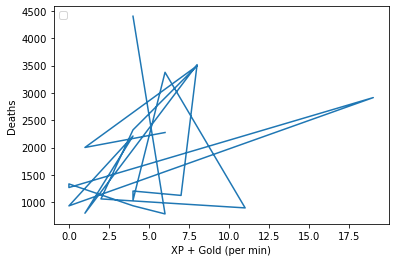

In [84]:
fig, ax = plt.subplots()
# ax.plot(df['xp_per_min'], df['deaths'], label='XPM')
# ax.plot(df['gold_per_min'], df['deaths'], label='GPM')
ax.plot(df['kills'], df['duration'])
# ax.plot(df['duration'], df['kills'])
plt.xlabel('XP + Gold (per min)')
plt.ylabel('Deaths')
ax.legend(loc = 'upper left')
plt.show()
